In [29]:
import findspark
findspark.init()

In [30]:
import os
import warnings
warnings.filterwarnings('ignore')
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, FloatType
from pyspark.sql.functions import split, count, when, isnan, col, regexp_replace
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [31]:
spark = SparkSession.builder.appName('First Session').getOrCreate()

print('Spark Version: {}'.format(spark.version))

Spark Version: 3.5.0


root
 |-- tanggal: string (nullable = true)
 |-- pelabuhan: string (nullable = true)
 |-- kapal_berangkat: integer (nullable = true)
 |-- kapal_tiba: integer (nullable = true)
 |-- penumpang_naik: integer (nullable = true)
 |-- penumpang_turun: integer (nullable = true)



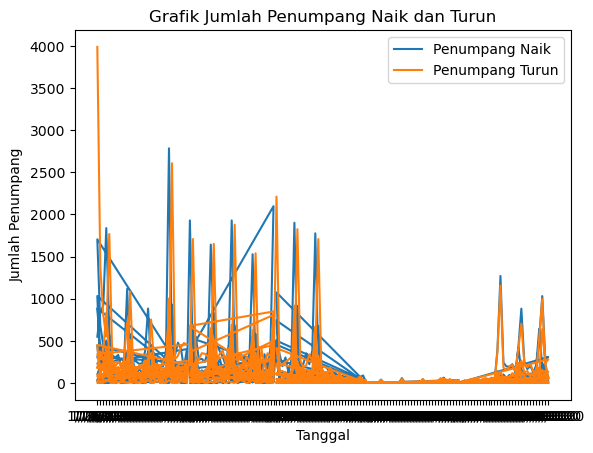

In [12]:
# Import library PySpark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt

# Inisialisasi SparkSession
spark = SparkSession.builder.appName("PassengerPrediction").getOrCreate()

# Membaca dataset dari file CSV
dataset = spark.read.csv("data.csv", header=True, inferSchema=True)

# Menampilkan schema dataset
dataset.printSchema()

# Visualisasi data menggunakan matplotlib
tanggal = dataset.select("tanggal").rdd.flatMap(lambda x: x).collect()
penumpang_naik = dataset.select("penumpang_naik").rdd.flatMap(lambda x: x).collect()
penumpang_turun = dataset.select("penumpang_turun").rdd.flatMap(lambda x: x).collect()

plt.plot(tanggal, penumpang_naik, label='Penumpang Naik')
plt.plot(tanggal, penumpang_turun, label='Penumpang Turun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.title('Grafik Jumlah Penumpang Naik dan Turun')
plt.legend()
plt.show()

In [58]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("PassengerPrediction").getOrCreate()

# Load dataset
data = spark.read.csv("data.csv", header=True, inferSchema=True)

# Pilih kolom yang akan digunakan untuk prediksi
feature_cols = ['penumpang_naik']

# Gabungkan kolom-kolom yang dipilih menjadi satu kolom vektor
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Inisialisasi model logistic regression
lr = LogisticRegression(labelCol="penumpang_turun", featuresCol="features")

# Membuat pipeline
pipeline = Pipeline(stages=[assembler, lr])

# Split data menjadi training dan testing set
(training_data, testing_data) = data.randomSplit([0.8, 0.2], seed=50)

# Melatih model menggunakan training data
model = pipeline.fit(training_data)

# Prediksi menggunakan testing data
predictions = model.transform(testing_data)

from pyspark.ml.evaluation import RegressionEvaluator

# ...

# Prediksi menggunakan testing data
predictions = model.transform(testing_data)

# Menambahkan kolom prediksi ke dataset
result_df = predictions.select("tanggal", "pelabuhan", "kapal_berangkat", "kapal_tiba", "penumpang_naik", "penumpang_turun", "prediction")

# Menampilkan beberapa baris pertama
result_df.show()

# ...


evaluator = RegressionEvaluator(labelCol="penumpang_naik", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) pada data uji = %g" % rmse)

# Menghentikan Spark Session
spark.stop()


+---------+----------------+---------------+----------+--------------+---------------+----------+
|  tanggal|       pelabuhan|kapal_berangkat|kapal_tiba|penumpang_naik|penumpang_turun|prediction|
+---------+----------------+---------------+----------+--------------+---------------+----------+
| 1/1/2020|     UNTUNG JAWA|             15|        15|           445|            452|     142.0|
|1/10/2020|     MUARA ANGKE|              8|        10|           289|            266|      90.0|
|1/12/2020|PRAMUKA/PANGGANG|              6|         6|           209|            105|      18.0|
|1/12/2020|          SABIRA|              1|         1|             8|              8|       0.0|
|1/12/2020|   TIDUNG/PAYUNG|              6|         5|           568|            142|      74.0|
|1/13/2020|         LANCANG|              6|         6|            54|             74|      15.0|
|1/13/2020|          SABIRA|              1|         1|             6|              5|       0.0|
|1/16/2020|         